**Задачи**

Выделить ключевые слова в тексте:

1) Считать текст из файла. Рассчитать частоту слов в тексте. 

2) Привести слова к нормальной форме с помощью библиотеки pymorphy2.

3) С помощью межквартильных размахов выделить слова, которые являются выбросами в полученной выборке. 

4) Являются ли выбросы стоп-словами?


In [ ]:
!pip install pymorphy2

In [ ]:
import pymorphy2
import numpy as np
import pandas as pd
import string
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
f = open('/content/drive/My Drive/Colab Notebooks/Perm_IT_Univer/ML/1_Stop_word/text.txt', encoding='utf-8')
text = f.read()
text = text.lower()
#text = text.replace('ё', 'e')
text

'добрый день, уважаемые любители футбола. 33-й тур чемпионата англии начался ещё в субботу, а закончится лишь завтра. дело в том, что в эти выходные помимо регулярных матча чемпионата в англии прошли полуфиналы национального кубка и участники этих встреч проведут свои матчи чемпионата в середине недели. напомню, что в субботу "арсенал" потерпел поражение от "челси" 1:2. в том поединке андрей аршавин вышел на замену лишь во втором тайме. однако в чемпионате он наверняка выйдет с первых минут, особенно с учётом кадровых потерь у команды арсена венгера.\n\n\n\nу "канониров" сейчас вообще очень тяжёлый график. 15 апреля они сыграли ответный полуфинальный матч лиги чемпионов, 18 апреля кубковый матч с "челси", а сегодня 21 апреля ещё один поединок, и какой... в гостях с "ливерпулем! три последним поединка между ними в чемпионате закончились со счётом 1:1. у обеих команд на кону приличные серии, хозяева не проигрывали у себя дома в чемпионате уже 27 матчей, а "арсенал" 18 последних игр в чем

In [ ]:
words = pd.DataFrame(re.findall(r"[\w']+", text), columns=['word'])
words.head(20)

,word
0,добрый
1,день
2,уважаемые
3,любители
4,футбола
5,33
6,й
7,тур
8,чемпионата
9,англии


In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
words['word'] = [morph.parse(word)[0].normal_form
        for word in words['word']]
words['count'] = 1

In [ ]:
words

,word,count
0,добрый,1
1,день,1
2,уважаемый,1
3,любитель,1
4,футбол,1
...,...,...
2056,дмитрий,1
2057,шахов,1
2058,до,1
2059,новый,1


In [ ]:
key_words = words.groupby('word').count().sort_values('count', ascending =False).reset_index()

In [ ]:
Q1, Q2, Q3, Q4 = np.percentile(key_words['count'], [25,50,75,90])
IQR = Q3-Q1
upper_inner = Q3+3 *IQR
#персентиль выбросов
upper_inner

5.0

In [ ]:
#выбросы
blowout = key_words[key_words['count']>upper_inner]
np.array(blowout)

array([['в', 77],
       ['на', 59],
       ['и', 58],
       ['не', 43],
       ['но', 33],
       ['мяч', 32],
       ['с', 30],
       ['ворота', 24],
       ['он', 24],
       ['а', 22],
       ['у', 21],
       ['фабиански', 20],
       ['аршавино', 16],
       ['свой', 16],
       ['ещё', 16],
       ['по', 16],
       ['пробить', 16],
       ['всё', 15],
       ['это', 15],
       ['тот', 14],
       ['андрей', 14],
       ['торрес', 14],
       ['штрафной', 14],
       ['арсенал', 13],
       ['что', 13],
       ['быть', 12],
       ['весь', 12],
       ['атака', 12],
       ['бенаюна', 11],
       ['ливерпуль', 11],
       ['матч', 11],
       ['очень', 11],
       ['один', 11],
       ['из', 11],
       ['они', 10],
       ['команда', 10],
       ['вот', 10],
       ['передача', 9],
       ['хозяин', 9],
       ['за', 9],
       ['уже', 9],
       ['который', 9],
       ['сыграть', 8],
       ['счёт', 8],
       ['от', 8],
       ['мерсисайдец', 8],
       ['поле', 8],
      

In [ ]:
#загружаем русские стоп-слова
from nltk.corpus import stopwords
stop_words = pd.Series(stopwords.words("russian"))
s = pd.Series(['ещё','всё','это', 'весь','очень'])
stop_words = stop_words.append(s)
np.array(stop_words)

array(['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как',
       'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у',
       'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот',
       'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда',
       'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть',
       'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь',
       'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут',
       'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем',
       'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже',
       'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того',
       'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом',
       'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были',
       'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец',
       'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот',
 

In [ ]:
#доля стоп-слов в подмножестве выбросов
stop_word_in_text = blowout[blowout['word'].isin(stop_words)]
print(round(stop_word_in_text['word'].count() * 100 / blowout['word'].count(), 1),'%')
stop_word_in_text

40.0 %


,word,count
0,в,77
1,на,59
2,и,58
3,не,43
4,но,33
6,с,30
8,он,24
9,а,22
10,у,21
14,ещё,16


Видим, что в выбросы попадают не только стоп-слова


In [ ]:
#Не стоп-слова в подмножестве выбросов
blowout.drop(blowout[blowout['word'].isin(stop_words)].index)

,word,count
5,мяч,32
7,ворота,24
11,фабиански,20
12,аршавино,16
13,свой,16
16,пробить,16
20,андрей,14
21,торрес,14
22,штрафной,14
23,арсенал,13


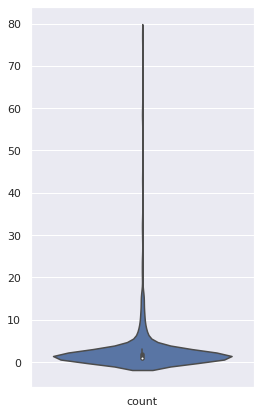

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(4,7)})
sns.violinplot(data=key_words)

In [ ]:
key_words.to_excel('key_words.xlsx', index = False)